In [14]:
import pandas
import numpy as np
import pandas as pd
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
lottery = pd.read_csv('./Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv')
lottery

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0
...,...,...,...,...
2319,08/16/2024,22 38 48 51 61,5,3.0
2320,08/20/2024,05 20 26 49 51,24,4.0
2321,08/23/2024,28 30 44 66 69,2,3.0
2322,08/27/2024,16 18 21 54 65,5,2.0


In [16]:

winning_numbers_split = lottery['Winning Numbers'].str.split(' ', expand=True)

# Rename the new columns to more meaningful names
winning_numbers_split.columns = ['Num1', 'Num2', 'Num3', 'Num4', 'Num5']
winning_numbers_split["Ball"] = lottery["Mega Ball"]
winning_numbers_split

,Num1,Num2,Num3,Num4,Num5,Ball
0,20,36,37,48,67,16
1,14,39,43,44,67,19
2,09,38,47,49,68,25
3,15,16,18,39,59,17
4,05,11,25,27,64,13
...,...,...,...,...,...,...
2319,22,38,48,51,61,5
2320,05,20,26,49,51,24
2321,28,30,44,66,69,2
2322,16,18,21,54,65,5


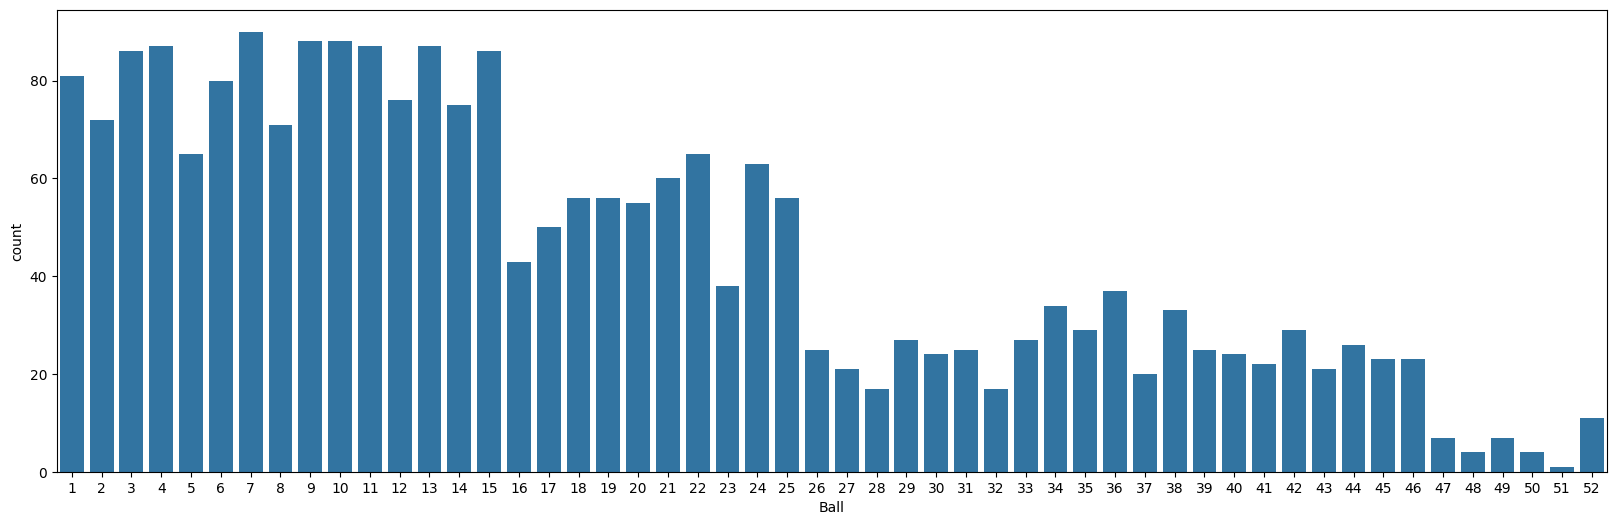

In [42]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Ball', data=winning_numbers_split)

# Show the plot
plt.show()

In [61]:
winning_numbers_split["cNum1"] = "02"
winning_numbers_split["cNum2"] = "17"
winning_numbers_split["cNum3"] = "31"
winning_numbers_split["cNum4"] = "46"
winning_numbers_split["cNum5"] = "48"
winning_numbers_split["cBall"] = "7"
winning_numbers_split

,Num1,Num2,Num3,Num4,Num5,Ball,cNum1,cNum2,cNum3,cNum4,cNum5,cBall
0,20,36,37,48,67,16,02,17,31,46,48,7
1,14,39,43,44,67,19,02,17,31,46,48,7
2,09,38,47,49,68,25,02,17,31,46,48,7
3,15,16,18,39,59,17,02,17,31,46,48,7
4,05,11,25,27,64,13,02,17,31,46,48,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,22,38,48,51,61,5,02,17,31,46,48,7
2320,05,20,26,49,51,24,02,17,31,46,48,7
2321,28,30,44,66,69,2,02,17,31,46,48,7
2322,16,18,21,54,65,5,02,17,31,46,48,7


In [64]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [48]:
x = winning_numbers_split[["Num1", "Num2", "Num3", "Num4", "Num5", "Ball"]]
y = winning_numbers_split[["cNum1", "cNum2", "cNum3", "cNum4", "cNum5", "cBall"]]
y

,cNum1,cNum2,cNum3,cNum4,cNum5,cBall
0,02,17,31,46,52,7
1,02,17,31,46,52,7
2,02,17,31,46,52,7
3,02,17,31,46,52,7
4,02,17,31,46,52,7
...,...,...,...,...,...,...
2319,02,17,31,46,52,7
2320,02,17,31,46,52,7
2321,02,17,31,46,52,7
2322,02,17,31,46,52,7


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test

,Num1,Num2,Num3,Num4,Num5,Ball
1566,02,12,45,46,56,20
840,07,10,14,40,47,34
1613,08,17,25,28,53,1
1739,14,31,41,45,48,20
1761,13,27,36,39,51,33
...,...,...,...,...,...,...
1054,10,11,12,28,43,45
892,10,11,20,42,55,9
212,01,24,25,40,70,4
1359,08,09,31,37,44,38


In [65]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [67]:
new_draw = pd.DataFrame({
    'Num1': [1],
    'Num2': [2],
    'Num3': [3],
    'Num4': [4],
    'Num5': [5],
    'Ball': [6]
})

predicted_max_numbers = model.predict(new_draw)
print("Predicted Maximum Numbers:", predicted_max_numbers)


Predicted Maximum Numbers: [[ 2. 17. 31. 46. 52.  7.]]


In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

# Train the decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred = tree.predict(X_test_encoded)

In [57]:
tree.fit(X_train_encoded,y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_pred = tree.predict(X_test_encoded)

# Print the predicted values
print("Predicted values:", y_pred)

Predicted values: [['02' '17' '31' '46' '52' '7']
 ['02' '17' '31' '46' '52' '7']
 ['02' '17' '31' '46' '52' '7']
 ...
 ['02' '17' '31' '46' '52' '7']
 ['02' '17' '31' '46' '52' '7']
 ['02' '17' '31' '46' '52' '7']]


In [62]:
# Assuming you have already trained your Decision Tree model

# Get the predicted probabilities for the test set
predicted_probabilities = tree.predict_proba(X_test_encoded)

# Display the predicted probabilities
print("Predicted probabilities for each class:")
for i, probs in enumerate(predicted_probabilities):
    print(f"Sample {i}: {probs}")


Predicted probabilities for each class:
Sample 0: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [